<a href="https://colab.research.google.com/github/zqiaohe/wordcloudsforbooks/blob/master/%D0%9E%D0%B1%D0%BB%D0%B0%D0%BA%D0%B0_%D1%81%D0%BB%D0%BE%D0%B2_%D0%B4%D0%BB%D1%8F_%D0%BB%D0%B8%D1%82%D0%B5%D1%80%D0%B0%D1%82%D1%83%D1%80%D0%BD%D1%8B%D1%85_%D0%BF%D1%80%D0%BE%D0%B8%D0%B7%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Перед работой смените настройки блокнота

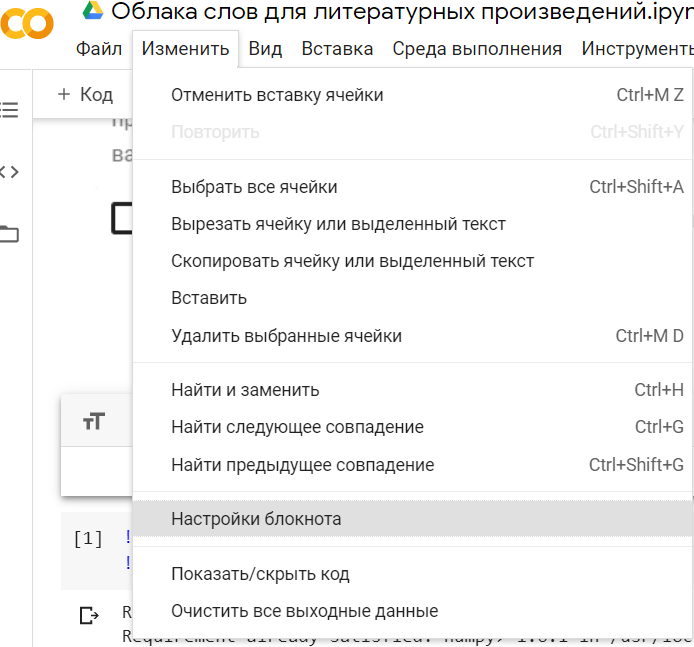

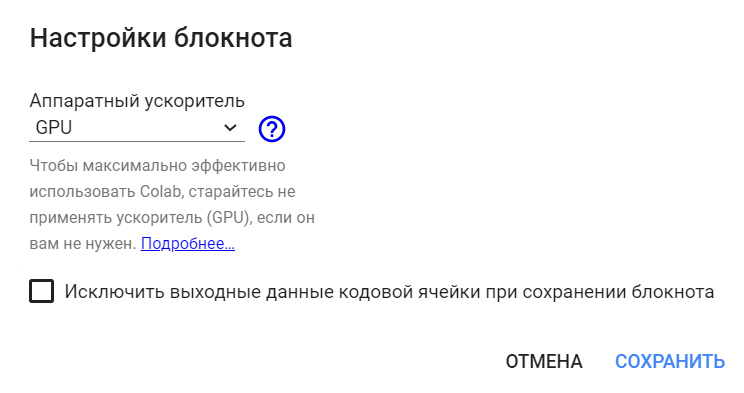

# Начало работы

In [1]:
!pip install wordcloud
!pip install pymystem3
!pip install pymorphy2

In [78]:
#библиотека для обработки изображений, краткий обзор возможностей https://habr.com/ru/post/451074/
from PIL import Image 

#библиотека для работы с числовыми матрицами, например изображений
import numpy as np 

#библиотека для отрисовки графиков
import matplotlib.pyplot as plt

#библиотека для облаков слов
from wordcloud import WordCloud, ImageColorGenerator

#для удобной загрузки файлов
from google.colab import files

import re

In [169]:
#загружаем стопслова
upload = files.upload()

Saving stopwords.txt to stopwords (1).txt


In [176]:
#загружаем текст, для которого будем делать облако
text = files.upload()

Saving ppravda.txt to ppravda.txt


In [177]:
#загружаем текст, для этого открываем файл по пути и считываем его в переменную текст
text = text["ppravda.txt"].decode("utf-8").lower()

In [178]:
#создаем множество стопслов, здесь первая 1000 самых частых слов, но этого не достаточно
Stopwords = "".join(upload['stopwords.txt'].decode('utf-8').split('\n')).split('\r')
Stopwords = set(Stopwords)

In [179]:
import pymorphy2
from string import punctuation 
#Создание лемматизатора
morph = pymorphy2.MorphAnalyzer()
russian_stopwords = Stopwords

#Предобработка текста
def preprocess_text(text):
    tokens = text.lower().split(" ")

    tokens = [morph.parse(token.strip(punctuation))[0].normal_form for token in tokens if token not in russian_stopwords\
              and token != " " ]
    
    text = " ".join(tokens)
    
    return text

In [180]:
preprocessed_text = preprocess_text(text)

In [181]:
#создаем переменную wordcloud 

wordcloud = WordCloud(background_color="white", max_font_size=40, stopwords = Stopwords).generate(preprocessed_text) 


(-0.5, 399.5, 199.5, -0.5)

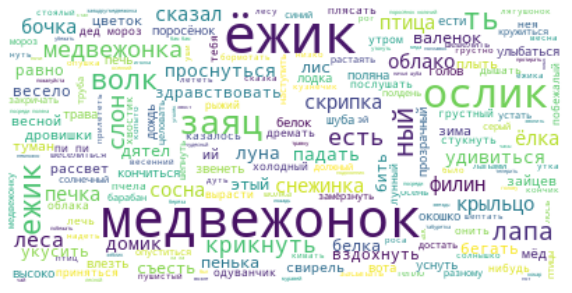

In [182]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [279]:
#создаем маску, на которую будут накладываться слова
mask = np.array(Image.open("/content/unnamed.jpg"))

In [280]:
#создаем генератор цветов по нашей маске
image_colors = ImageColorGenerator(mask)

In [286]:
wc = WordCloud(background_color="white", max_words=2000,  max_font_size=30, min_font_size=2, mask=mask,
               stopwords=Stopwords, contour_width=0, contour_color='black')

In [287]:
wc.generate(preprocessed_text)

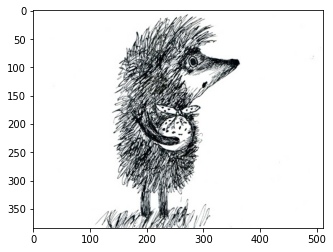

In [283]:
plt.imshow(mask)

(-0.5, 511.5, 383.5, -0.5)

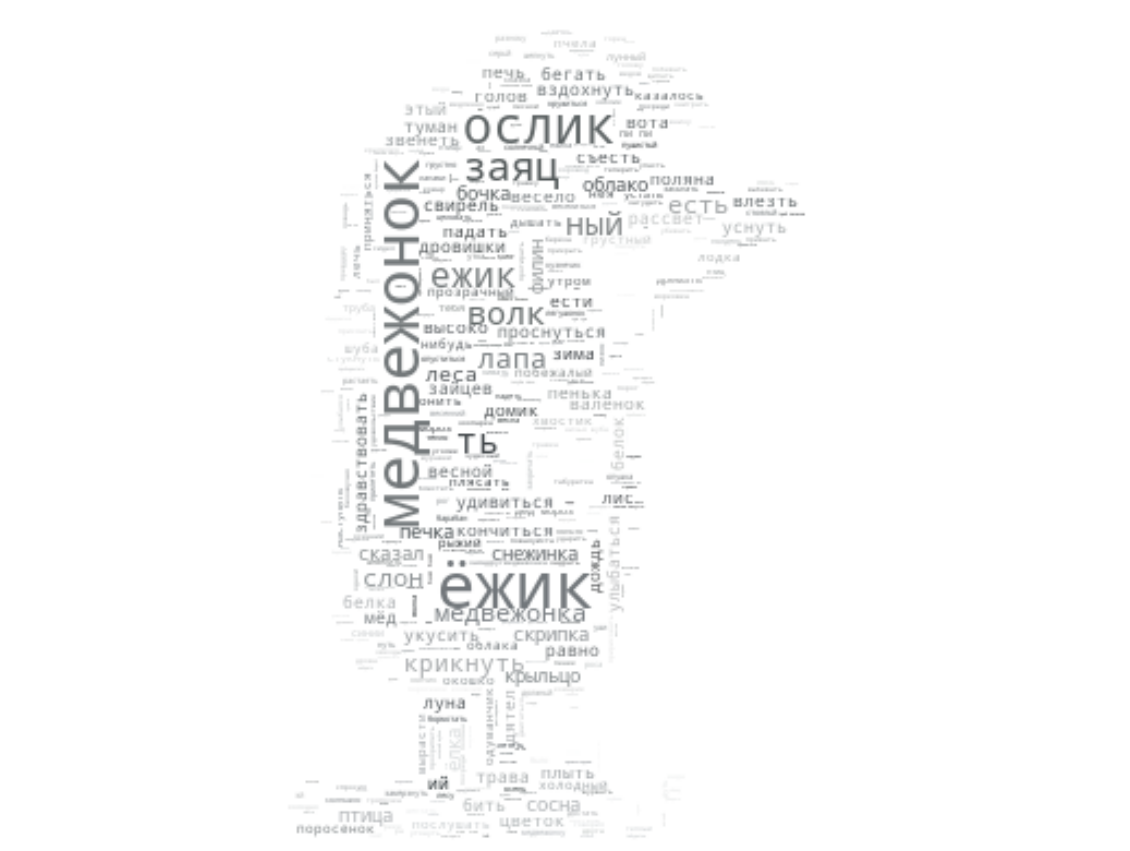

In [290]:
plt.figure(figsize=(20,20))
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")